# Ames Regression Project 

# Table of Contents
- [0.0 Introduction, Library Imports, Data Import and Initial Inspection](#0.0-Introduction,-Library-Imports,-Data-Import-and-Initial-Inspection)
   - [0.1 Project Summary](#0.1-Project-Summary)
   - [0.2 Introduction to Dataset](#0.2-Introduction-to-Dataset)
   - [0.3 Overall Goal](#0.3-Overall-Goal)
   - [0.4 Library Imports](#0.4-Library-Imports)
   - [0.5 Data Import and Initial Inspection](#0.5-Data-Import-and-Initial-Inspection)
- [1.0 Exploratory Data Analysis](#1.0-Exploratory-Data-Analysis)
   - [1.1 Missing Data Quick Look](#1.1-Missing-Data-Quick-Look)
   - [1.2 Numerical Data Distributions](#1.2-Numerical-Data-Distributions)
   - [1.3 Analysis Of Sales Price](#1.3-Analysis-Of-Sales-Price)
       - [1.3.1 Distribution of Sales Price](#1.3.1-Distribution-of-Sales-Price)
       - [1.3.2 Transformed Target Label](#1.3.2-Transformed-Target-Label)
   - [1.4 Analysis of Sales Price vs. Some ""Common Sense"" Features](#1.4-Analysis-of-Sales-Price-vs.-Some-""Common-Sense""-Features)
       - [1.4.1 Scatterplots of Common Sense Features vs. Sales price](#1.4.1-Scatterplots-of-Common-Sense-Features-vs.-Sales-price)
       - [1.4.2 Sales Price vs. Overall Quality](#1.4.2-Sales-Price-vs.-Overall-Quality)
       - [1.4.3 Sales Price vs. Overall Condition](#1.4.3-Sales-Price-vs.-Overall-Condition)
   - [1.5 Correlation Heat Map and Correlation Matrix](#1.5-Correlation-Heat-Map-and-Correlation-Matrix)
   - [1.6 Experimenting with Attribute Combinations](#1.6-Experimenting-with-Attribute-Combinations)
- [2.0 Data Preparation](#2.0-Data-Preparation)
   - [2.1 Analysis of Missing Data](#2.1-Analysis-of-Missing-Data)
       - [2.1.1 Missing Data: PoolQC, MiscFeature, Alley](#2.1.1-Missing-Data:-PoolQC,-MiscFeature,-Alley)
       - [2.1.2 Missing Data: Fence](#2.1.2-Missing-Data:-Fence)
       - [2.1.3 Missing Data: Fireplace Quality](#2.1.3-Missing-Data:-Fireplace-Quality)
       - [2.1.4 Missing Data: Lot Frontage](#2.1.4-Missing-Data:-Lot-Frontage)
       - [2.1.5 Missing Data: Garage Features](#2.1.5-Missing-Data:-Garage-Features)
       - [2.1.6 Missing Data: Basement Features](#2.1.6-Missing-Data:-Basement-Features)
       - [2.1.7 Missing Data: Masonry Veneer Features](#2.1.7-Missing-Data:-Masonry-Veneer-Features)
       - [2.1.8 Missing Data: Electrical](#2.1.8-Missing-Data:-Electrical)
   - [2.2 Outlier analysis](#2.2-Outlier-analysis)
       - [2.2.1 Sales Price Outliers](#2.2.1-Sales-Price-Outliers)
       - [2.2.2 Features with Potential Outliers](#2.2.2-Features-with-Potential-Outliers)
       - [2.2.3 Lot Frontage: Potential Outliers](#2.2.3-Lot-Frontage:-Potential-Outliers)
       - [2.2.4 Masonry Veneer Area: Potential Outliers](#2.2.4-Masonry-Veneer-Area:-Potential-Outliers)
       - [2.2.5 Basement Finished Sq Ft 1: Potential Outliers](#2.2.5-Basement-Finished-Sq-Ft-1:-Potential-Outliers)
       - [2.2.6 Basement Finished Sq Ft 2: Potential Outliers](#2.2.6-Basement-Finished-Sq-Ft-2:-Potential-Outliers)
   - [2.3 Missing Data and Outlier Conclusions](#2.3-Missing-Data-and-Outlier-Conclusions)
   - [2.4 Potential Data Leakage](#2.4-Potential-Data-Leakage)
   - [2.5 Create Transformer for Custom Features](#2.5-Create-Transformer-for-Custom-Features)
   - [2.6 Remove Outliers from Data](#2.6-Remove-Outliers-from-Data)
   - [2.7 Transformation of Target Label](#2.7-Transformation-of-Target-Label)
   - [2.8 Create data pipeline](#2.8-Create-data-pipeline)
   - [2.9 Data Preparation Final Notes](#2.9-Data-Preparation-Final-Notes)
- [3.0 Model Selection and Model Tuning](#3.0-Model-Selection-and-Model-Tuning)
   - [3.1 Base Model: Always Predict Mean](#3.1-Base-Model:-Always-Predict-Mean)
   - [3.2 Quick and Dirty Models](#3.2-Quick-and-Dirty-Models)
       - [3.2.1 Quick and Dirty Models: Training](#3.2.1-Quick-and-Dirty-Models:-Training)
       - [3.2.2 Quick and Dirty Model Results](#3.2.2-Quick-and-Dirty-Model-Results)
       - [3.2.3 Quick and Dirty Model Conclusions](#3.2.3-Quick-and-Dirty-Model-Conclusions)
   - [3.3 Model Tuning](#3.3-Model-Tuning)
       - [3.3.1 Support Vector Machine Regressor with RBF Kernel](#3.3.1-Support-Vector-Machine-Regressor-with-RBF-Kernel)
       - [3.3.2 Gradient Boosting Regressor](#3.3.2-Gradient-Boosting-Regressor)
       - [3.3.3 Random Forest Regressor](#3.3.3-Random-Forest-Regressor)
       - [3.3.4 ElasticNet](#3.3.4-ElasticNet)
   - [3.4 Save Models](#3.4-Save-Models)
   - [3.5 Load Models](#3.5-Load-Models)
   - [3.6 Score Tuned Models](#3.6-Score-Tuned-Models)
   - [3.7 Model Learning Curves](#3.7-Model-Learning-Curves)
   - [3.8 Model Ensembling](#3.8-Model-Ensembling)
- [4.0 Final Predictions](#4.0-Final-Predictions)


# 0.0 Introduction, Library Imports, Data Import and Initial Inspection

## 0.1 Project Summary
This is my second Kaggle competition and is a regression task.  Specifically, the project involves building a supervised machine learning model to predict the price of a home in Ames Iowa, based on a dataset compiled by Dean De Cock.  I have included a summary of the dataset in section 0.1 of this notebook.  

This was quite a fun project as there are 80 explanatory features to work with in the dataset, so a significant chunk of the work is feature engineering, which I enjoy.  I've also placed an emphasis on preprocessing data with sk-learn pipelines rather than pandas, as this is much more efficient when it comes time to pre-process the test set.  

At a high level, I ended up tuning SVM, Random Forest, Gradient Boosting, and Elastic Net Regression models.  I also created an Ensemble Model from these four models.  The model that performed the best on the test set was the SVM Regressor (rbf kernel), with a final score of 0.12274 (it beat the Ensemble model which is interesting!).  One thing to note - as Kaggle already splits the dataset into a train set and a test set, I did not further split the test set again into a test set and validation set.  I chose not to do this since the dataset only has 1,460 training instances.  Rather, I use cross validation when building my ML models.

I hope you enjoy my notebook!

All work is my own.

## 0.2 Introduction to Dataset
The dataset that I work with in this notebook is the "Ames Housing dataset", created by Dean De Cock.  It contains data on 1,460 homes in Ames, Iowa.  Specifically, there are 80 explanatory features that describe each of these residential homes.  A summary of these features , including their types, is included below:


| Feature       | Description                                                            | Type                   |
|---------------|------------------------------------------------------------------------|------------------------|
| MSSubClass    | Identifies the type of dwelling involved in the sale                   | Categorical            |
| MSZoning      | Identifies the general zoning classification of the sale               | Categorical            |
| LotFrontage   | Linear feet of street connected to property                            | Numerical (continuous) |
| LotArea       | Lot size in square feet                                                | Numerical (continuous) |
| Street        | Type of road access to property                                        | Categorical            |
| Alley         | Type of alley access to property                                       | Categorical            |
| LotShape      | General shape of property                                              | Categorical            |
| LandContour   | Flatness of the property                                               | Categorical            |
| Utilities     | Type of utilities available                                            | Categorical            |
| LotConfig     | Lot configuration                                                      | Categorical            |
| LandSlope     | Slope of property                                                      | Categorical            |
| Neighborhood  | Physical locations within Ames city limits                             | Categorical            |
| Condition1    | Proximity to various conditions                                        | Categorical            |
| Condition2    | Proximity to various conditions (if more than one is present)          | Categorical            |
| BldgType      | Type of dwelling                                                       | Categorical            |
| HouseStyle    | Style of dwelling                                                      | Categorical            |
| OverallQual   | Rates the overall material and finish of the house                     | Ordinal                |
| OverallCond   | Rates the overall condition of the house                               | Ordinal                |
| YearBuilt     | Original construction date                                             | Categorical            |
| YearRemodAdd  | Remodel date (same as construction date if no remodeling or additions) | Categorical            |
| RoofStyle     | Type of roof                                                           | Categorical            |
| RoofMatl      | Roof material                                                          | Categorical            |
| Exterior1st   | Exterior covering on house                                             | Categorical            |
| Exterior2nd   | Exterior covering on house (if more than one material)                 | Categorical            |
| MasVnrType    | Masonry veneer type                                                    | Categorical            |
| MasVnrArea    | Masonry veneer area in square feet                                     | Numerical (continuous) |
| ExterQual     | Evaluates the quality of the material on the exterior                  | Ordinal                |
| ExterCond     | Evaluates the present condition of the material on the exterior        | Ordinal                |
| Foundation    | Type of foundation                                                     | Categorical            |
| BsmtQual      | Evaluates the height of the basement                                   | Categorical/Ordinal?   |
| BsmtCond      | Evaluates the general condition of the basement                        | Categorical/Ordinal?   |
| BsmtExposure  | Refers to walkout or garden level walls                                | Categorical/Ordinal?   |
| BsmtFinType1  | Rating of basement finished area                                       | Categorical/Ordinal?   |
| BsmtFinSF1    | Type 1 finished square feet                                            | Numerical (continuous) |
| BsmtFinType2  | Rating of basement finished area (if multiple types)                   | Categorical/Ordinal?   |
| BsmtFinSF2    | Type 2 finished square feet                                            | Numerical (continuous) |
| BsmtUnfSF     | Unfinished square feet of basement area                                | Numerical (continuous) |
| TotalBsmtSF   | Total square feet of basement area                                     | Numerical (continuous) |
| Heating       | Type of heating                                                        | Categorical            |
| HeatingQC     | Heating quality and condition                                          | Ordinal                |
| CentralAir    | Central air conditioning                                               | Categorical            |
| Electrical    | Electrical system                                                      | Categorical            |
| 1stFlrSF      | First Floor square feet                                                | Numerical (continuous) |
| 2ndFlrSF      | Second floor square feet                                               | Numerical (continuous) |
| LowQualFinSF  | Low quality finished square feet (all floors)                          | Numerical (continuous) |
| GrLivArea     | Above grade (ground) living area square feet                           | Numerical (continuous) |
| BsmtFullBath  | Basement full bathrooms                                                | Numerical (discrete)   |
| BsmtHalfBath  | Basement half bathrooms                                                | Numerical (discrete)   |
| FullBath      | Full bathrooms above grade                                             | Numerical (discrete)   |
| HalfBath      | Half baths above grade                                                 | Numerical (discrete)   |
| Bedroom       | Bedrooms above grade (does NOT include basement bedrooms)              | Numerical (discrete)   |
| Kitchen       | Kitchens above grade                                                   | Numerical (discrete)   |
| KitchenQual   | Kitchen quality                                                        | Ordinal                |
| TotRmsAbvGrd  | Total rooms above grade (does not include bathrooms)                   | Numerical (discrete)   |
| Functional    | Home functionality (Assume typical unless deductions are warranted)    | Ordinal                |
| Fireplaces    | Number of fireplaces                                                   | Numerical (discrete)   |
| FireplaceQu   | Fireplace quality                                                      | Categorical/Ordinal?   |
| GarageType    | Garage location                                                        | Categorical            |
| GarageYrBlt   | Year garage was built                                                  | Categorical            |
| GarageFinish  | Interior finish of the garage                                          | Categorical            |
| GarageCars    | Size of garage in car capacity                                         | Numerical (discrete)   |
| GarageArea    | Size of garage in square feet                                          | Numerical (continuous) |
| GarageQual    | Garage quality                                                         | Categorical/Ordinal?   |
| GarageCond    | Garage condition                                                       | Categorical/Ordinal?   |
| PavedDrive    | Paved driveway                                                         | Categorical            |
| WoodDeckSF    | Wood deck area in square feet                                          | Numerical (continuous) |
| OpenPorchSF   | Open porch area in square feet                                         | Numerical (continuous) |
| EnclosedPorch | Enclosed porch area in square feet                                     | Numerical (continuous) |
| 3SsnPorch     | Three season porch area in square feet                                 | Numerical (continuous) |
| ScreenPorch   | Screen porch area in square feet                                       | Numerical (continuous) |
| PoolArea      | Pool area in square feet                                               | Numerical (continuous) |
| PoolQC        | Pool quality                                                           | Categorical/Ordinal?   |
| Fence         | Fence quality                                                          | Categorical/Ordinal?   |
| MiscFeature   | Miscellaneous feature not covered in other categories                  | Categorical/Ordinal?   |
| MiscVal       | Value of miscellaneous feature                                         | Numerical (continuous) |
| MoSold        | Month Sold (MM)                                                        | Categorical            |
| YrSold        | Year Sold (YYYY)                                                       | Categorical            |
| SaleType      | Type of sale                                                           | Categorical            |
| SaleCondition | Condition of sale                                                      | Categorical            |

## 0.3 Overall Goal
The overall goal of this project is to train a supervised learning model that is able to predict the price of a home in Ames, Iowa which is a regression problem.  The metric that is used for this kaggle competition is RLMSE - or root log mean squared error.  This is a slight variation on regular RMSE, and assesses models on the difference between the logaritm of the predicted value and the logarithm of the observed sales price.  This essentially means that errors in predicting expensive houses and cheap houses affect the final score equally

## 0.4 Library Imports
Below you can find the imports of the libraries that I used throughout this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from joblib import dump, load
import warnings
from sklearn.exceptions import ConvergenceWarning

## 0.5 Data Import and Initial Inspection
In this section I read in the dataset, and run some common pandas commands to perform a high level inspection of it

In [2]:
# define explicit data types
dtypes = ({
    'ID': int,
    'MSSubClass': 'category',
    'MSZoning': 'category',
    'LotFrontage': float,
    'LotArea': float,
    'Street': 'category',
    'Alley': 'category',
    'LotShape': 'category',
    'LandContour': 'category',
    'Utilities': 'category',
    'LotConfig': 'category',
    'LandSlope': 'category',
    'Neighborhood': 'category',
    'Condition1': 'category',
    'Condition2': 'category',
    'BldgType': 'category',
    'HouseStyle': 'category',
    'OverallQual': int,
    'OverallCond': int,
    'YearBuilt': 'category',
    'YearRemodAdd': 'category',
    'RoofStyle': 'category',
    'RoofMatl': 'category',
    'Exterior1st': 'category',
    'Exterior2nd': 'category',
    'MasVnrType': 'category',
    'MasVnrArea': float,
    'ExterQual': 'category',
    'ExterCond': 'category',
    'Foundation': 'category',
    'BsmtQual': 'category',
    'BsmtCond': 'category',
    'BsmtExposure': 'category',
    'BsmtFinType1':'category',
    'BsmtFinSF1': float,
    'BsmtFinType2': 'category',
    'BsmtFinSF2': float,
    'BsmtUnfSF': float,
    'TotalBsmtSF': float,
    'Heating': 'category',
    'HeatingQC': 'category',
    'CentralAir': 'category',
    'Electrical': 'category',
    '1stFlrSF': float,
    '2ndFlrSF': float,
    'LowQualFinSF': float,
    'GrLivArea': float,
    'BsmtFullBath': float,
    'BsmtHalfBath': float,
    'FullBath': float,
    'HalfBath': float,
    'BedroomAbvGr': float,
    'KitchenAbvGr': float,
    'KitchenQual': 'category',
    'TotRmsAbvGrd': float,
    'Functional': 'category',
    'Fireplaces': float,
    'FireplaceQu': 'category',
    'GarageType': 'category',
    'GarageYrBlt': 'category',
    'GarageFinish': 'category',
    'GarageCars': float,
    'GarageArea': float,
    'GarageQual': 'category',
    'GarageCond': 'category',
    'PavedDrive': 'category',
    'WoodDeckSF': float,
    'OpenPorchSF': float,
    'EnclosedPorch': float,
    '3SsnPorch': float,
    'ScreenPorch': float,
    'PoolArea': float,
    'PoolQC': 'category',
    'Fence': 'category',
    'MiscFeature': 'category',
    'MiscVal': float,
    'MoSold': 'category',
    'YrSold': 'category',
    'SaleType': 'category',
    'SaleCondition': 'category',
    'SalesPrice': float
})

In [3]:
# create paths to training and test data
train_path = '../input/house-prices-advanced-regression-techniques/train.csv'
test_path = '../input/house-prices-advanced-regression-techniques/test.csv'

# load data into training and test sets
data = pd.read_csv(train_path, dtype=dtypes)
data_test = pd.read_csv(test_path, dtype=dtypes)

In [4]:
# inspect top of dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal,250000


In [5]:
# inspect bottom of data set
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,GdPrv,Shed,2500.0,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6,2008,WD,Normal,147500


In [6]:
# inspect summary of dataset, making note of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   float64 
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [7]:
# analyze summary statistics on numeric features
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0


# 1.0 Exploratory Data Analysis
- In this section I perform some exploratory data analysis, data exploration, and data visualization
- Note that I take a copy of the dataset to perform this analysis on, to ensure there are no accidental changes to the original dataset.

In [8]:
# create copy of data for exploratory analysis
data_explore = data.copy()

## 1.1 Missing Data Quick Look
- Here, I use a helper function that I've created in the past to print a dataframe that contains features where data is missing
- The dataframe contains the total missing values, as well as the % of missing data for each category
- Further, in this section I only take a quick look at what the missing values are, so that I have a sense of this before data visualization
- In section 2 of this workbook, I actually decide how to deal with the missing values

In [9]:
def missing_data(df):
    '''Calculate and create a dataframe that summarizes the missing data in a dataset
    
    Parameters
    -----------
    df : pandas.DataFrame
        The dataset that you want to determine missing data for
        
    Returns
    -------
    missing : pandas.DataFrame
        Pandas DataFrame that summarizes the missing data.
    '''
    
    # get missing data and create pandas DataFrame
    missing = df.isnull().sum().sort_values(ascending=False)
    missing = missing[missing > 0]
    missing = pd.DataFrame(missing, columns=['total_missing'])
    
    # calculate % of missing data for each category and add column to DataFrame
    missing['missing_pct'] = np.round(missing['total_missing'] / len(df), 3)
    
    return missing

In [10]:
# get missing data for Ames dataset
missing_data(data_explore)

,total_missing,missing_pct
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageYrBlt,81,0.055
GarageCond,81,0.055
GarageType,81,0.055
GarageFinish,81,0.055


- It looks like PoolQC, MiscFeature, Alley, and Fence all have < 80% of their values missing.
- FireplaceQu has ~50% missing, and then the remaining categories with missing data have between 0.001% to 20% of data missing.

## 1.2 Numerical Data Distributions
- In this section I'll take a quick look at the distributions of the numerical features to see if there are any features that appear to have skewed distributions, and potentially contain any outliers

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


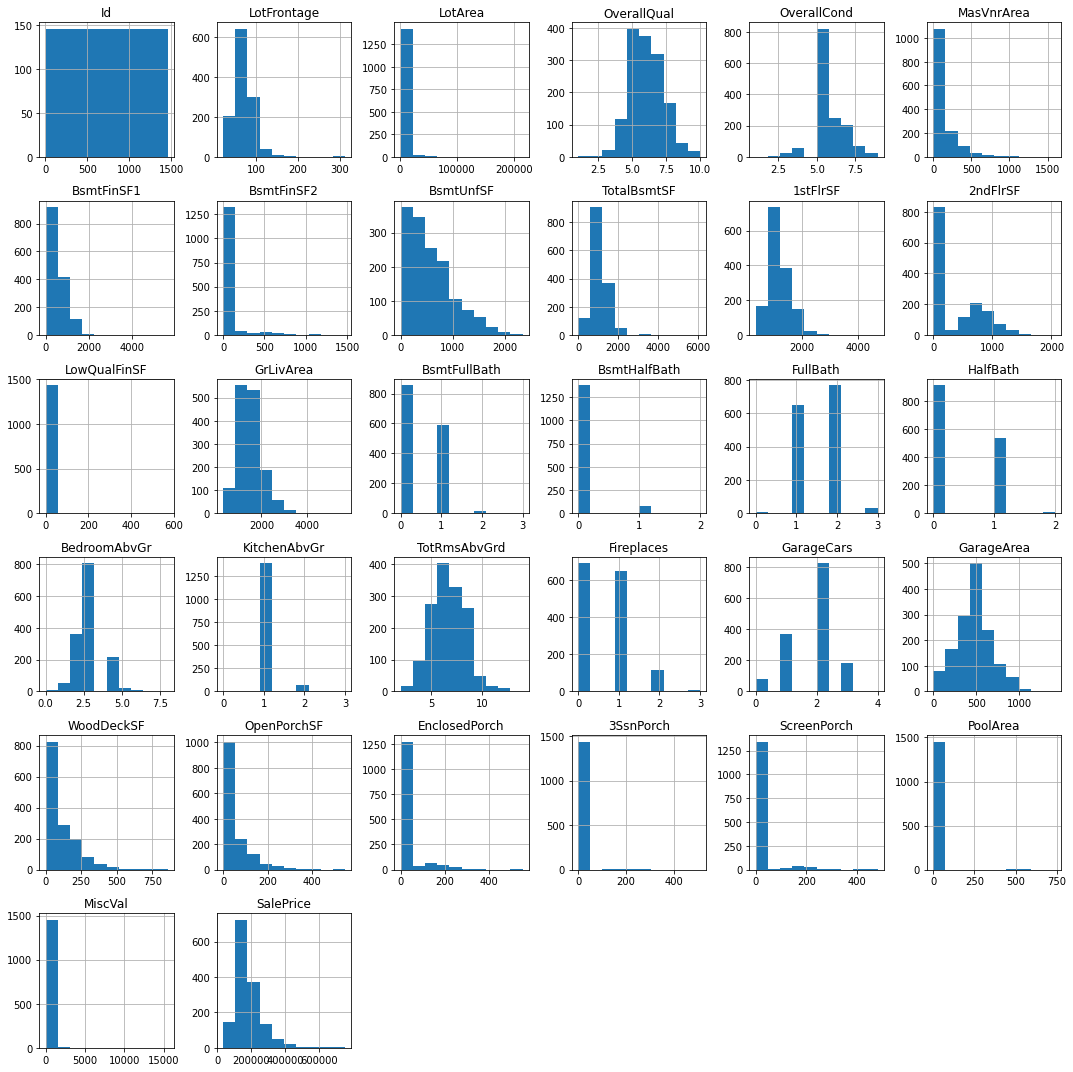

In [11]:
# plots histograms of all the numerical features in the dataset
data_explore.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

- It looks like 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' are quite skewed.
- I'll analyze this further in section 2 where I deal with outliers

## 1.3 Analysis Of Sales Price
- Here I'll perfrom some quick analysis over Sales Price, which is the target label of our dataset

### 1.3.1 Distribution of Sales Price

In [12]:
# summary statistics on Sale Price
np.round(data_explore['SalePrice'].describe().transpose())

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

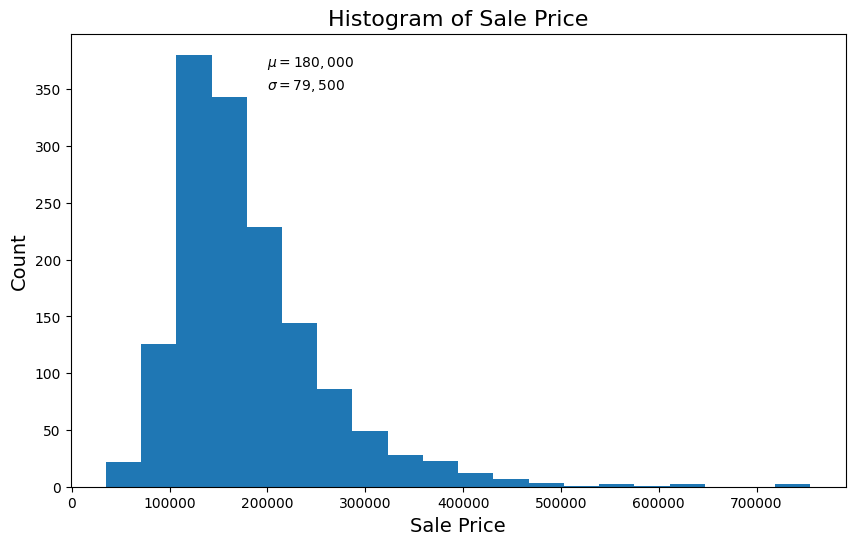

In [13]:
# plot histogram of sale price including mean/std dev from summary stats above
plt.figure(figsize=(10, 6), dpi=100)
plt.hist(x=data_explore['SalePrice'], bins=20)
plt.text(200000, 370, r'$\mu=180,000$')
plt.text(200000, 350, r'$\sigma=79,500$')
plt.title('Histogram of Sale Price', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

- It looks like Sale Price has a long tail to the right, with a few houses that sold for excess of 600,000
- Below I'll pull up these homes to see if there are any common features that jump out

In [14]:
# pull up potential outliers in Sale Price
data_explore[data_explore['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7,2007,WD,Abnorml,745000


- Below, I'll plot a histogram of Sales Price, but I'll exclude the homes with a price in excess of $600,000
- You'll see that the distribution is still quite skewed, and not a normal distribution which is what we would want

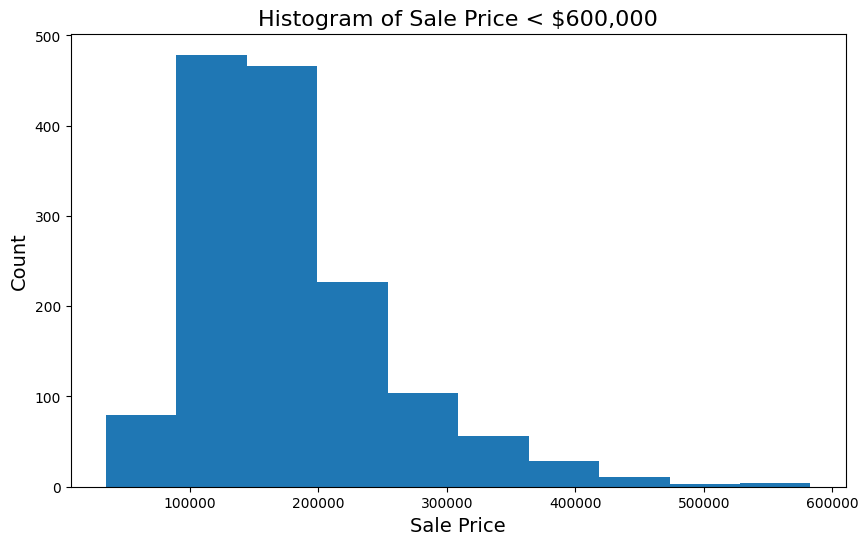

In [15]:
# plot histogram of sales price, excluding the 4 homes above
plt.figure(figsize=(10, 6), dpi=100)
data_explore[data_explore['SalePrice'] < 600000]['SalePrice'].hist()
plt.title('Histogram of Sale Price < $600,000', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(False)
plt.show()

### 1.3.2 Transformed Target Label
- Here, I'll try to transform the Sales Price distribtion into a normal distribution by applying a log transformation
- More specifically, I'll take the natural logarithm of the Sales Price for each training instance, and plot the resulting distribution
- You'll see that this transforms our target label nicely into a distribtion that is pretty normal

In [16]:
# summary statistics on log transformed Sale Price
np.log(data_explore[data_explore['SalePrice'] < 600000]['SalePrice']).describe()

count    1456.000000
mean       12.020185
std         0.393085
min        10.460242
25%        11.774520
50%        12.001199
75%        12.271392
max        13.275828
Name: SalePrice, dtype: float64

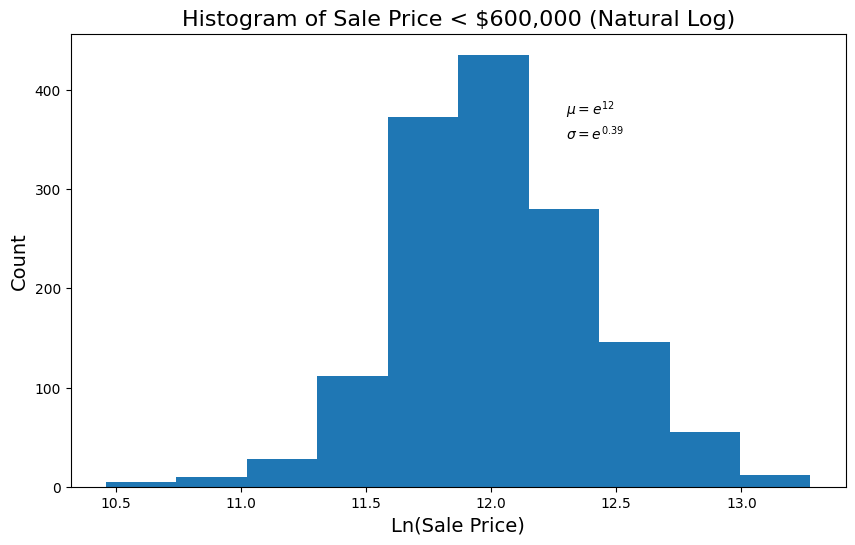

In [17]:
# perform log transformation on Sales Price and plot resulting distribution
plt.figure(figsize=(10, 6), dpi=100)
np.log(data_explore[data_explore['SalePrice'] < 600000]['SalePrice']).hist()
plt.text(12.3, 375, r'$\mu=e^{12}$')
plt.text(12.3, 350, r'$\sigma=e^{0.39}$')
plt.title('Histogram of Sale Price < $600,000 (Natural Log)', fontsize=16)
plt.xlabel('Ln(Sale Price)', fontsize=14)
plt.grid(False)
plt.ylabel('Count', fontsize=14)
plt.show()

- Based on the above, I will perform the log transformation on Sales Price before building my ML models

## 1.4 Analysis of Sales Price vs. Some "Common Sense" Features
- Here, I've picked out a few numerical features that I would think would have a strong correlation with sales price based on my common sense
- To pick these out I tried to imagine myself as a home buyer, or as a realator, and then to decide what features I'd pay more for in a house, or what features would help improve a selling price
- Specifically, the features I've looked at are Living Area, Lot Area, Basement SF, and 1st Floor SF

### 1.4.1 Scatterplots of Common Sense Features vs. Sales price

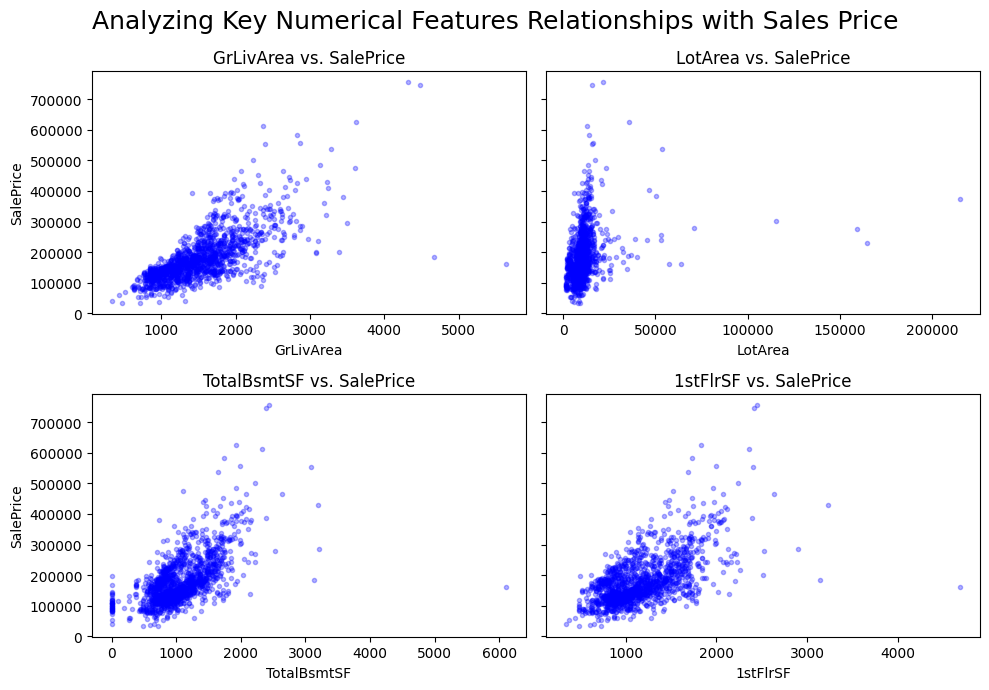

In [18]:
# "common sense" features that I've picked out
num_var = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF']

# create subplots to plot scatter plots in
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10, 7), dpi=100)

# loop through features and plot each
for ax, num_var in zip(axs.flat, num_var):
    ax.plot(data_explore[num_var], data_explore['SalePrice'], ".b", alpha=0.3)
    ax.set_xlabel(str(num_var))
    ax.set_title(str(num_var) + ' vs. SalePrice')

# plot y axis labels
for ax in range(0, 2):
    axs[ax, 0].set_ylabel('SalePrice')

# chart title
plt.suptitle("Analyzing Key Numerical Features Relationships with Sales Price", fontsize=18)
plt.tight_layout()

It looks like the Lot Area scatter plot was impacted by a few outliers - below I've zoomed in on the plot for lot areas between 0 to 60,000 sq feet.

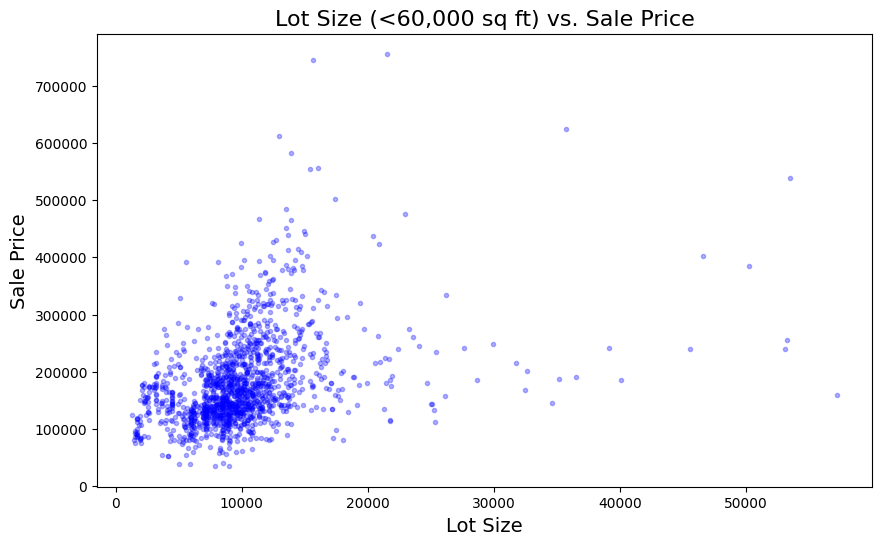

In [19]:
# same plot for Lo Area but zoomed in to lot sizes < 60000 sq ft
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(data_explore[data_explore['LotArea'] < 60000]['LotArea'], 
         data_explore[data_explore['LotArea'] < 60000]['SalePrice'], 
         ".b", alpha=0.3)
plt.title('Lot Size (<60,000 sq ft) vs. Sale Price', fontsize=16)
plt.xlabel('Lot Size', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

Based on these scatter plots it looks like most of the features have varying strengths of positive correlations with Sales Price, as I expected

### 1.4.2 Sales Price vs. Overall Quality
- Here I'll take a look at the relationship between Overall Quality and Sales Price
- My intuition would tell me that these should be positively correleated

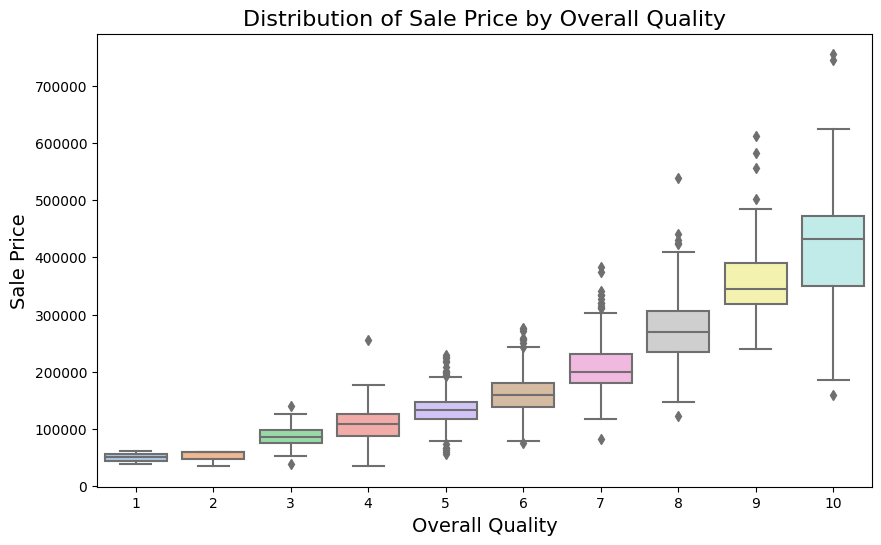

In [20]:
# plot sales price vs overall quality
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='OverallQual', y='SalePrice', data=data_explore, palette='pastel')
plt.title('Distribution of Sale Price by Overall Quality', fontsize=16)
plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

As I expected, it looks like as the overall quality of a home goes up, the sales price also does for the most part

### 1.4.3 Sales Price vs. Overall Condition
- Here I'll perform a similar analysis to the above, except we'll compare Sales Price to overall condition rather than overall quality

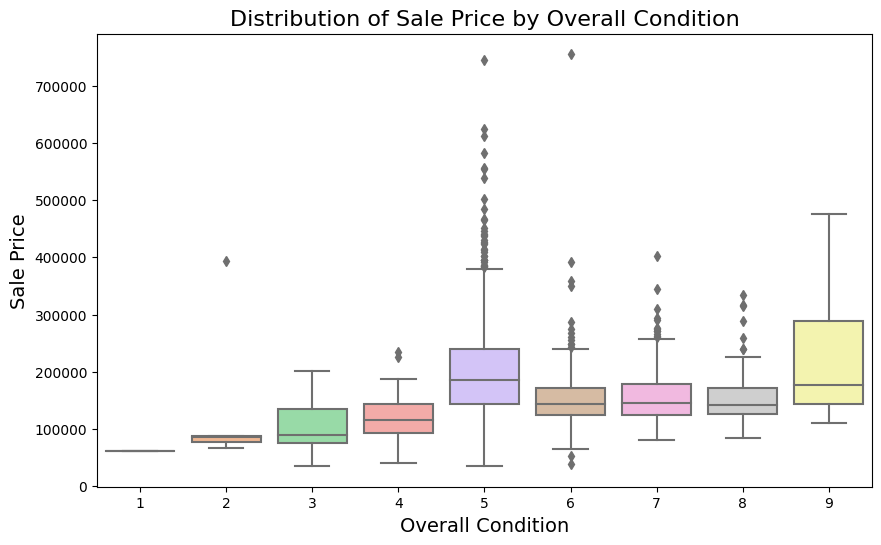

In [21]:
# plot sales price vs overall condition
plt.figure(figsize=(10, 6), dpi=100)
sns.boxplot(x='OverallCond', y='SalePrice', data=data_explore, palette='pastel')
plt.title('Distribution of Sale Price by Overall Condition', fontsize=16)
plt.xlabel('Overall Condition', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.show()

- Interesting, this is not what I expected, it looks like overall condition and sales price don't have as strong relationship of a relationship as overall quality
- Category 5 seems to also have quite a skewed distribution

## 1.5 Correlation Heat Map and Correlation Matrix
- In this section I'll plot a correlation heat map and correlation matrix in order to analyze how the numerical features are correlated with Sales Price

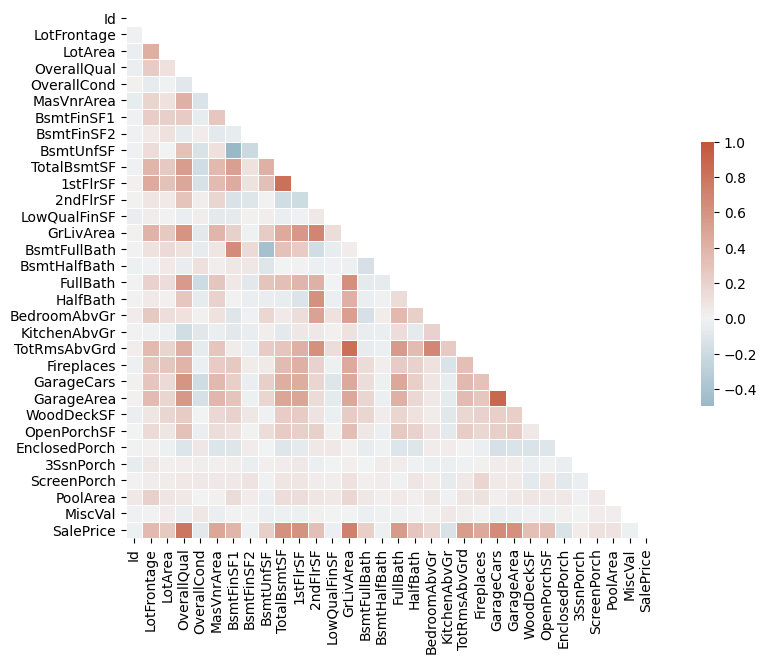

In [22]:
# plot correlation heatmap
plt.figure(figsize=(12,7), dpi=100)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=data_explore.corr(),
            mask=np.triu(np.ones_like(data_explore.corr(), dtype=bool)),
            square=True,
            vmax=1,
            center=0,
            cmap=cmap,
            linewidths=.7,
            cbar_kws={"shrink": .5})
plt.show()

In [23]:
# plot correlation matrix for Sale Price
corr_matrix = data_explore.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

- It looks like we have a range of correlations with Sale Price
- A couple features are strongly positively correlated, names overall quality and living area
- There are then a bunch of features in the range of 0.5 to 0.65 positive correlation
- A small subset of them almost have 0 correlation, and there theres also a few with some level of weak negative correlation as well

## 1.6 Experimenting with Attribute Combinations
- Here I'll experiment with some attribute combinations, it order to see if these end up being strongly correlated with Sales Price
- I have prefixed all of these with two stars ** so that we can easily identify them in the correlation matrix that I'll rerun after creating them
- Note that I'm creating these within the data_explore copy dataset, if an aggregated feature turns out to be promising, I'll build it into the ML pipeline later
- Specifically, I've created the following aggregated features:
    - Total indoor square footage
    - Total outdoor square footage
    - Total bathrooms (full and half)
    - Total rooms above ground (bedrooms and all types of bathrooms)
    - Total basement and garage square footage

In [24]:
# consists of all features related to indoor square footage
data_explore['**IndoorSqFt'] = data_explore['TotalBsmtSF'] + data_explore['1stFlrSF'] + data_explore['2ndFlrSF'] + data_explore['GarageArea']

# consists of all features related to outdoor square footagee
data_explore['**OutdoorSqFt'] = data_explore['WoodDeckSF'] + data_explore['OpenPorchSF'] + data_explore['EnclosedPorch'] + data_explore['3SsnPorch'] + data_explore['ScreenPorch']

# consists of all features realted to both full and half size bathrooms
data_explore['**TotalBaths'] = data_explore['FullBath'] + data_explore['BsmtFullBath'] + data_explore['HalfBath'] + data_explore['BsmtHalfBath']

# consists of all features related to bedrooms and bathrooms
data_explore['**RmsAndBathAbvGrd'] = data_explore['TotRmsAbvGrd'] + data_explore['FullBath'] + data_explore['BsmtFullBath'] + data_explore['HalfBath'] + data_explore['BsmtHalfBath']

# consists of all features related basement and garage square footage
data_explore['**BsmtAndGarage'] = data_explore['GarageArea'] + data_explore['TotalBsmtSF']

In [25]:
# rerun the correlation matrix with the newly aggregated features
corr_matrix = data_explore.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice             1.000000
**IndoorSqFt          0.809561
OverallQual           0.790982
GrLivArea             0.708624
**BsmtAndGarage       0.701179
**RmsAndBathAbvGrd    0.644795
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
**TotalBaths          0.613005
1stFlrSF              0.605852
FullBath              0.560664
TotRmsAbvGrd          0.533723
MasVnrArea            0.477493
Fireplaces            0.466929
**OutdoorSqFt         0.390993
BsmtFinSF1            0.386420
LotFrontage           0.351799
WoodDeckSF            0.324413
2ndFlrSF              0.319334
OpenPorchSF           0.315856
HalfBath              0.284108
LotArea               0.263843
BsmtFullBath          0.227122
BsmtUnfSF             0.214479
BedroomAbvGr          0.168213
ScreenPorch           0.111447
PoolArea              0.092404
3SsnPorch             0.044584
BsmtFinSF2           -0.011378
BsmtHalfBath         -0.016844
MiscVal              -0.021190
Id      

- It looks like IndoorSqFt, BsmtAndGarage, and RmsAndBAthAbvGrd have promising correlations with Sales Price.
- For learning purposes, I'll build all of these aggregated features into my ML pipeline later, and also include hyperparameters in the pipeline to turn the features with lower correlations "on" and "off" which can help in model tuning.

# 2.0 Data Preparation
- In this section I prepare the data so that we can start testing out some ML models
- Note, I'll take a copy of the original data again so that no changes to the original dataset are made by accident
- At a high level I performed the following:
    - Assess how to deal with missing data
    - Assess how to deal with outliers
    - Discuss any potential data leakage
    - Create a custom transformer for aggregated features
    - Build an sk-learn pipeline to transform the dataset

In [26]:
# take a copy of the dataset for preparation purposes
data_prep = data.copy()

## 2.1 Analysis of Missing Data
- Here I'll look at missing data for relevant categories and decide how to deal with each category respectively

In [27]:
# get summary of missing data again
missing_data(data_prep)

,total_missing,missing_pct
PoolQC,1453,0.995
MiscFeature,1406,0.963
Alley,1369,0.938
Fence,1179,0.808
FireplaceQu,690,0.473
LotFrontage,259,0.177
GarageYrBlt,81,0.055
GarageCond,81,0.055
GarageType,81,0.055
GarageFinish,81,0.055


### 2.1.1 Missing Data: PoolQC, MiscFeature, Alley
- These features have > 90% of data missing, I'll just drop them as this would be nearly impossible to fill accurately

### 2.1.2 Missing Data: Fence
- The fence feature has 81% of data missing
- Also, based on the categories that it contains, it would be difficult to fill this missing data accurately
- I'll drop this feature as well

In [28]:
# get value counts of Fence feature
data_prep['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

### 2.1.3 Missing Data: Fireplace Quality
- It looks like fireplace quality has 690 missing values
- Based on a comparison to the feature Fireplaces (number of fireplaces), it looks like all 690 of these missing values are houses where there are 0 fireplaces
- Therefore I'll fill these mising data with "none"

In [29]:
# get total number of houses with 0 fireplaces where fireplace quality is NaN
data_prep[data_prep['Fireplaces'] == 0]['FireplaceQu'].isna().sum()

690

In [30]:
# get total number of houses with > 0 fireplaces where fireplace quality is NaN (opposite of the above)
data_prep[data_prep['Fireplaces'] != 0]['FireplaceQu'].isna().sum()

0

### 2.1.4 Missing Data: Lot Frontage
- Lot frontage is missing 259 values, or ~18% of data
- Based on the below, if we remove the outlier (which is analyzed in the next section), the data is a bit skewed, but not overly skewed.
- I'll fill the missing values with the median.

In [31]:
# summary statistics on lot frontage
data_prep['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

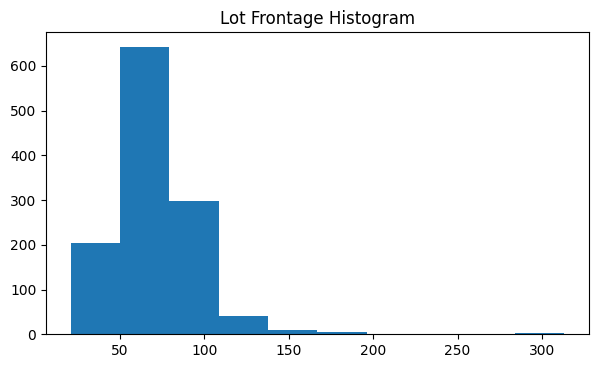

In [32]:
# histogram of lot frontage
plt.figure(figsize=(7, 4), dpi=100)
data_prep['LotFrontage'].hist()
plt.title("Lot Frontage Histogram")
plt.grid(False)
plt.show()

### 2.1.5 Missing Data: Garage Features
- It looks like we have a pattern where there are several garage related features with missing data
- To analyze these, I've created a dataframe that contains the 81 missing values for each feature and compared then to garage area (sq footage of garage) and garage type
- It looks like all of these features, the garage area is 0, and the garage type is NaN, meaning there is no garage in the house
- Therefore, I'll replace these NaNs in these categories with "none"

In [33]:
# comapre garage missing features with garage area
garage_feat = ['GarageArea', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
data_prep[data_prep['GarageType'].isna()][garage_feat].sort_values('GarageArea', ascending=False)

,GarageArea,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
39,0.0,NaN,NaN,NaN,NaN,NaN
649,0.0,NaN,NaN,NaN,NaN,NaN
1038,0.0,NaN,NaN,NaN,NaN,NaN
1030,0.0,NaN,NaN,NaN,NaN,NaN
1011,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
441,0.0,NaN,NaN,NaN,NaN,NaN
434,0.0,NaN,NaN,NaN,NaN,NaN
431,0.0,NaN,NaN,NaN,NaN,NaN
393,0.0,NaN,NaN,NaN,NaN,NaN


### 2.1.6 Missing Data: Basement Features
- Similarily, it looks like there are a bunch of basement features with missing data
- I've compared these features with missing data to the feature that includes the total square footage of the basement
- It looks like for almost all of them, the total basement square footage is 0
- For these features, I'll replace the NaN's with "none"
- For training instance 332, I'll just delete this one from our dataset

In [34]:
# compare basement missing features with basement square footage
bsmt_feat = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','TotalBsmtSF']
data_prep[data_prep['BsmtFinType2'].isna()][bsmt_feat]

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,TotalBsmtSF
17,NaN,NaN,NaN,NaN,NaN,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0
332,NaN,No,Gd,TA,GLQ,3206.0
342,NaN,NaN,NaN,NaN,NaN,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0


### 2.1.7 Missing Data: Masonry Veneer Features
- Masonry veneer area and type both have 8 missing values (which is a very little amount of missing data)
- It looks like its the same training instances that are missing both types of data
- Based on the analysis below for veneer area, I'll simply replace the missing values with 0 (which is actually also the median)
- In terms of masonry veneer type, I'll replace the missing values with "none"

In [35]:
# summary statistics for masonry veneer area
data_prep['MasVnrArea'].median()

0.0

In [36]:
# determine which training instances are missing the data related to Masonry
data_prep[data_prep['MasVnrArea'].isna()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


### 2.1.8 Missing Data: Electrical
- Electrical is missing one value
- I'll replace this with the most common value that comes up in the data

In [37]:
# get value counts of electrical feature
data_prep['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

## 2.2 Outlier analysis
- In this section, I'll analyze potential outliers in our target label and within the numerical features

### 2.2.1 Sales Price Outliers
- In Section 1, I identified that Sales Price was quite skewed - here I dig into this a bit more

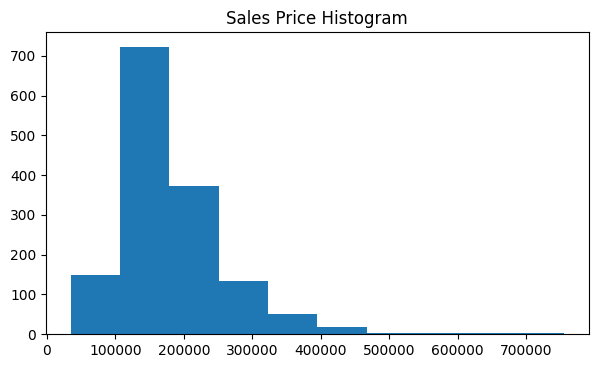

In [38]:
# plot histogram of sales price again to show skewed distribution
plt.figure(figsize=(7, 4), dpi=100)
plt.title("Sales Price Histogram")
data_prep['SalePrice'].hist()
plt.grid(False)
plt.show()

In [39]:
# pull up potential outliers
data_prep[data_prep['SalePrice'] > 600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7,2007,WD,Abnorml,745000


As there are only 4 homes that have a much higher sales price that the majority of the homes, I'll remove them from our dataset

### 2.2.2 Features with Potential Outliers
- In section 1, I identified that the following numerical features had skewed distributions
- First, I've replotted the histograms to show this, and then I analyze what to do with each feature seperately
- Note, I haven't analyzed every single feature, as some of these are so skewed in the sense that all the values are almost zero
- See the next section for how I'll deal with those

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


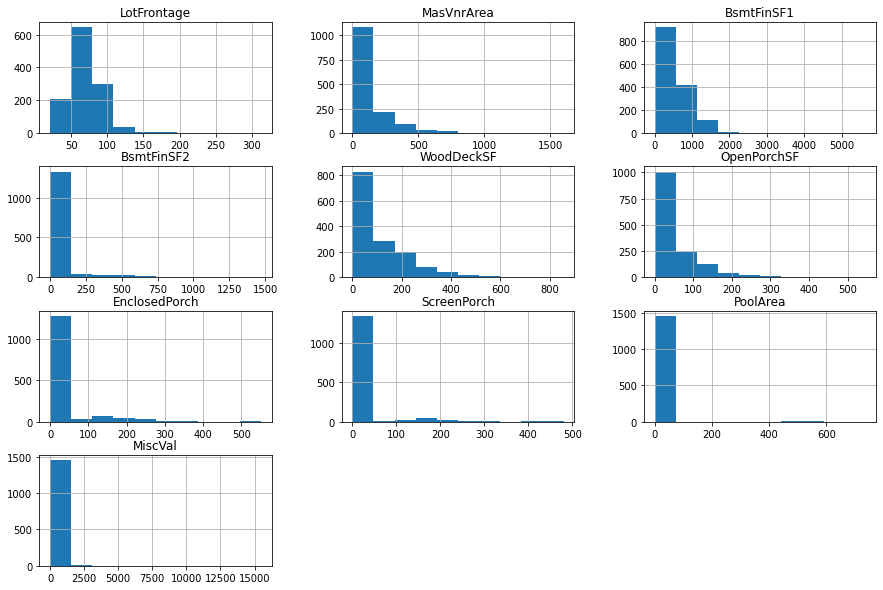

In [40]:
# features with potential outliers
outliers = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 
            'PoolArea', 'MiscVal']

# plot histograms of these features
data_prep[outliers].hist(figsize=(15,10))
plt.show()

### 2.2.3 Lot Frontage: Potential Outliers
- It looks like lot frontage may have a couple significant outliers where the frontage is greater than 200 sq ft
- Based on the below, there are two features with a lot frontage of 313 sq ft, training instances 934 and 1298
- I'll make a call to drop these two from the data set

In [41]:
# get potential lot frontage outliers
data_prep[data_prep['LotFrontage'] > 200]['LotFrontage']

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

### 2.2.4 Masonry Veneer Area: Potential Outliers
- It looks like masonry veneer area could have some outliers with > 1000 sq ft
- However, based on the below theres 7 training instances in this category, so I'll just keep it as is

In [42]:
# get potential masonry veneer area outliers
data_prep[data_prep['MasVnrArea'] > 1000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682.0,Pave,NaN,IR2,HLS,AllPub,...,0.0,NaN,NaN,NaN,0.0,10,2006,New,Partial,438780
70,71,20,RL,95.0,13651.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2,2007,WD,Normal,244000
115,116,160,FV,34.0,3230.0,Pave,Pave,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6,2007,WD,Normal,176000
297,298,60,FV,66.0,7399.0,Pave,Pave,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,6,2007,WD,Normal,239000
691,692,60,RL,104.0,21535.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1,2007,WD,Normal,755000
808,809,80,RL,85.0,13400.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,GdWo,NaN,0.0,6,2006,WD,Normal,159950
1169,1170,60,RL,118.0,35760.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2006,WD,Normal,625000


### 2.2.5 Basement Finished Sq Ft 1: Potential Outliers
- It looks like BsmtFinSF1 may have some significant outliers
- Based on the below, training instance 1298 is a significant outlier with a BsmtFinSF1 area of 5644 sq foot (that's a huge basement lol)
- This training instance is actually the same one with outliers in lot frontage, so it'll be dropped as well

In [43]:
# get potential basement finished sqft 1 area outliers
data_prep[data_prep['BsmtFinSF1'] > 2500]['BsmtFinSF1']

1298    5644.0
Name: BsmtFinSF1, dtype: float64

### 2.2.6 Basement Finished Sq Ft 2: Potential Outliers
- It looks like BsmtFinSF2 may have some outliers
- However, looking more closely at the distribution of BsmtFinSF2, most of the values in this feature are 0
- Therefore I'll just leave this feature as is

In [44]:
# get potential basement finished sqft 2 area outliers
data_prep[data_prep['BsmtFinSF2'] > 1100]['BsmtFinSF2']

322    1474.0
470    1120.0
542    1127.0
Name: BsmtFinSF2, dtype: float64

## 2.3 Missing Data and Outlier Conclusions
- Here's a summary of how I'll handle each feature that I identified that has either missing data and/or outliers

| Feature       | Missing Data | Significant Outliers | Missing Data Conclusion                       | Outlier Conclusion                    |
|---------------|--------------|----------------------|-----------------------------------------------|---------------------------------------|
| PoolQC        | Yes          | No                   | Drop feature, too much missing data           | NA                                    |
| MiscFeature   | Yes          | No                   | Drop feature, too much missing data           | NA                                    |
| Alley         | Yes          | No                   | Drop feature, too much missing data           | NA                                    |
| Fence         | Yes          | No                   | Drop feature, too much missing data           | NA                                    |
| FireplaceQu   | Yes          | No                   | Replace with "None"                           | NA                                    |
| LotFrontage   | Yes          | Yes                  | Replace missing values with median            | Drop training instance #1298 and #934 |
| GarageYrBlt   | Yes          | No                   | Replace with "None"                           | NA                                    |
| GarageCond    | Yes          | No                   | Replace with "None"                           | NA                                    |
| GarageType    | Yes          | No                   | Replace with "None"                           | NA                                    |
| GarageFinish  | Yes          | No                   | Replace with "None"                           | NA                                    |
| GarageQual    | Yes          | No                   | Replace with "None"                           | NA                                    |
| BsmtFinType2  | Yes          | No                   | Remove instance 332, replace rest with "None" | NA                                    |
| BsmtExposure  | Yes          | No                   | Remove instance 332, replace rest with "None" | NA                                    |
| BsmtQual      | Yes          | No                   | Replace with "None"                           | NA                                    |
| BsmtCond      | Yes          | No                   | Replace with "None"                           | NA                                    |
| BsmtFinType1  | Yes          | No                   | Replace with "None"                           | NA                                    |
| MasVnrArea    | Yes          | Yes                  | Replace with 0                                | Leave as is                           |
| MasVnrType    | Yes          | No                   | Replace with "None"                           | NA                                    |
| Electrical    | Yes          | No                   | Replace with most common                      | NA                                    |
| BsmtFinSF1    | No           | Yes                  | NA                                            | Drop training instance #1298          |
| BsmtFinSF2    | No           | Yes                  | NA                                            | Leave as is                           |
| WoodDeckSF    | No           | Yes                  | NA                                            | Leave as is                           |
| OpenPorchSF   | No           | Yes                  | NA                                            | Leave as is                           |
| EnclosedPorch | No           | Yes                  | NA                                            | Drop feature, majority nil values     |
| ScreenPorch   | No           | Yes                  | NA                                            | Drop feature, majority nil values     |
| PoolArea      | No           | Yes                  | NA                                            | Drop feature, majority nil values     |
| MiscVal       | No           | Yes                  | NA                                            | Drop feature, majority nil values     |


## 2.4 Potential Data Leakage
- Another thing to note is that the dataset contains the features MoSold (month sold), YrSold (year sold), SaleType, SaleCondition for each house
- If we leave these in, this would cause data leakage, we are creating a model to determine the future price of a house, which, before it's sold, we would not know the month or year of sale, we would also not know the type of sale or condition of sale
- Therefore I will remove these features well

## 2.5 Create Transformer for Custom Features
- Now I'll create a transformer to add the custom features (aggregated features) that I made earlier in section 1
- Note, in creating this class I'll inherit BaseEstimator and TransformerMixin from sklearn's base classes.  This gives CustomFeatures access to get_params and set_params from BaseEstimator, and fit_transform from TransformerMixin
- I'll also include an option to turn on the outdoorsqft and totalbaths features (these features weren't very correlated with sales price)

In [45]:
# create class that will create custom features in pipeline
class CustomFeatures(BaseEstimator, TransformerMixin):
    """Represents the custom features added to the Titanic dataset"""
    
    def __init__(self, add_outdoorsqft=False, add_totalbaths=False):
        self.add_outdoorsqft = add_outdoorsqft
        self.add_totalbaths = add_totalbaths
    
    def fit(self, X, y=None):
        return self    # nothing else to do
    
    def transform(self, X, y=None):
        # create copy of dataset to avoid changes to original
        X = X.copy()
        
        # indoor sq footage feature
        X['IndoorSqFt'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF'] + X['GarageArea']
        
        # total rooms feature
        X['RmsAndBathAbvGrd'] = X['TotRmsAbvGrd'] + X['FullBath'] + X['BsmtFullBath'] + X['HalfBath'] + X['BsmtHalfBath']

        # basement and garage sq footage feature
        X['BsmtAndGarage'] = X['GarageArea'] + X['TotalBsmtSF']
        
        # outdoor sq footage feature
        if self.add_outdoorsqft:
            X['OutdoorSqFt'] = X['WoodDeckSF'] + X['OpenPorchSF'] + X['EnclosedPorch'] + X['3SsnPorch'] + X['ScreenPorch']
        else:
            pass
        
        # total baths feature
        if self.add_totalbaths:
            X['TotalBaths'] = X['FullBath'] + X['BsmtFullBath'] + X['HalfBath'] + X['BsmtHalfBath']
        else:
            pass
        
        return X

## 2.6 Remove Outliers from Data
- In this section I'll remove the training instances noted in the summary of missing data and outlier conclusions from section 2.3
- I'll also remove the outliers in the target label Sales Price
- Specifically these are training instances 691, 898, 1169, 1182, 332, 934, 1298
- I'll take a copy of the dataset first just to ensure we have a untouched dataset to begin with

In [46]:
# take a fresh copy of the data
data_prep = data.copy()

# our training instances we will be dropping
to_drop = [691, 898, 1169, 1182, 332, 934, 1298]

In [47]:
# training instances to be removed
data_prep.iloc[to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623.0,Pave,NaN,IR1,Lvl,AllPub,...,555.0,Ex,MnPrv,NaN,0.0,7,2007,WD,Abnorml,745000
332,333,20,RL,85.0,10655.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,10,2009,WD,Normal,284000
934,935,20,RL,313.0,27650.0,Pave,NaN,IR2,HLS,AllPub,...,0.0,NaN,NaN,NaN,0.0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887.0,Pave,NaN,IR3,Bnk,AllPub,...,480.0,Gd,NaN,NaN,0.0,1,2008,New,Partial,160000


In [48]:
# drop the outliers from data
data_prep = data_prep.drop(labels=to_drop, axis=0)

## 2.7 Transformation of Target Label
- In this section I'll formally transform our target label, Sales Price
- In section 1 and 2 I discussed how Sales Price was quite skewed
- I've removed the outliers in section 2.6, so here as that is left to do is apply the log transformation

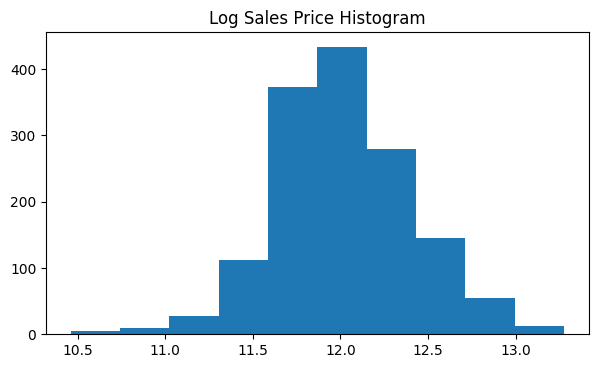

In [49]:
# histogram of log sales price to demonstrate normality of distribtion
plt.figure(figsize=(7, 4), dpi=100)
plt.title("Log Sales Price Histogram")
np.log(data_prep['SalePrice']).hist()
plt.grid(False)
plt.show()

In [50]:
# apply transformation to target label
data_prep['SalePriceLn'] = np.log(data_prep['SalePrice'])

In [51]:
# compare a few pre-transformed and transformed labels
data_prep[['SalePrice', 'SalePriceLn']].head()

,SalePrice,SalePriceLn
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


## 2.8 Create data pipeline
- In this section I'll build a pipeline to prepare the data using sklearn
- Doing the preprocessing in sklearn is beneficial compared to doing it in something like pandas, as oncce the pipeline for preprocessing is built, you can apply it to the test set (or new data), rather than having to re-write the pandas processing code for each dataset
- This pipeline will also either automatically drop features that I decided to drop earlier, or I'll do it when making the lists of feature labels
- The pipeline will be split into the following steps:
    - **Numerical pipeline**: Applied to numerical features.  This pipeline adds the custom numerical features discussed earlier in this notebook, fills the missing numerical data in LotFrontage with the median value, and then scales all the numerical features
    - **Categorical pipeline 1**: Applied to all categorical featuers except Electrical.  This pipeline imputes "none" into the categorical categories with missing data, and then one hot encodes the features.
    - **Categircal pipeline 2**: Applied to categorical feature Electrical.  Similar to the above, except replaces the missing values in Electrical with the most common occurence, and then one hot encodes
    - **Ordinal pipeline**: Applied to all ordinal featuers.  This pipeline imputes "none" into the ordinal categories with missing data, and then ordinal encodes the features.

In [52]:
# create dataset containing only our target labels
data_labels = data_prep['SalePriceLn'].copy()

# create dataset containing only our data features
data_features = data_prep.drop(['SalePrice', 'SalePriceLn'], axis=1)

In [53]:
# create summary of numerical features
num_features = data_features.select_dtypes(include=[np.number])

# remove features that will not be used for our ML model
num_features = num_features.drop(['Id', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)

In [54]:
# create a list of numerical features
num_features_list = list(num_features)

In [55]:
# print out list of numerical features and ensure it only contains features that I concluded to keep in dataset
num_features_list

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch']

In [56]:
# create list of ordinal features that will be used for our model
ord_features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1','BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 
                'GarageQual','GarageCond']

In [57]:
# create list of categorical features, excluding Electrical
cat_features1 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'GarageYrBlt', 
                'GarageFinish', 'PavedDrive']

In [58]:
# create list of categorical features, only including Electrical
cat_features2 = ['Electrical']

In [59]:
# numerical features pipeline
num_pipeline = Pipeline([
    ('custom_features', CustomFeatures()),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [60]:
# categorical features pipeline 1
cat_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# categorical features pipeline 2
cat_pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

In [61]:
# ordinal features pipeline
ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('encoder', OrdinalEncoder(handle_unknown='ignore'))
])

In [62]:
# full pipeline, applies all previous pipelines and drops columns with features that won't be used in modelling 
full_pipeline = ColumnTransformer(
   [('num', num_pipeline, num_features_list),
    ('cat1', cat_pipeline1, cat_features1),
    ('cat2', cat_pipeline2, cat_features2),
    ('ord', ord_pipeline, ord_features)],
    remainder='drop')

In [63]:
# apply pipeline to data
data_prepared = full_pipeline.fit_transform(data_features)

In [64]:
data_prepared.shape

(1453, 492)

## 2.9 Data Preparation Final Notes
- And that's it!  The data is now ready to build ML models
- Our final dataset has 492 features and 1453 training instances after the transformations and pipeline was applied

# 3.0 Model Selection and Model Tuning
- In this section I perform the following:
    - Create a Base Model, which is the score to beat - this model is one that always predicts the mean sales price from the training set
    - Model selection with "quick and dirty models"
    - Model tuning based on promising models above
    - Save the final models with joblib
- Below is a helper function I created to make scoring the models a bit faster

In [65]:
# helper function to score models
def calc_cv_scores(model, features=data_prepared, labels=data_labels, metric='neg_mean_squared_error', folds=5):
    scores = cross_val_score(model, X=features, y=labels, scoring=metric, cv=folds)
    scores = np.round(np.sqrt(-scores), 3)
    return scores

## 3.1 Base Model: Always Predict Mean
- First, I'll create a Base Model that always predicts the mean value from the train set
- This will be the model will provide the score to beat for the more formal ML models

In [66]:
# create base model and get predictions
base_model = np.ones(shape=(len(data_labels), 1))
base_pred =  base_model * data_labels.mean()

In [67]:
# score base model
np.round(np.sqrt(mean_squared_error(data_labels, base_pred)), 2)

0.39

## 3.2 Quick and Dirty Models
- Next, I'll train what I like to call "quick and dirty" models
- These are models that are purely trained based off of sk-learn's base settings with no modifications
- Once these are trained, I'll performed cross validation scoring to assess them, and then select the most promising ones for further tuning
- The models I've decided to include are:
    - Linear Regression
    - ElasticNet Regression
    - SVM Regression (Linear kernel)
    - SVM Regression (RBF kernel)
    - Decision Tree Regression
    - Random Forest Regression
    - Gradient Boosting Regression
    - XGB Regression

### 3.2.1 Quick and Dirty Models: Training

In [68]:
# the steps for each model below are
# 1) create instance of model
# 2) fit to train set
# 3) call helper scoring function and store these in a variable

# linear regression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)
lin_reg_scores = calc_cv_scores(lin_reg)

# elastic net regression
en_reg = ElasticNet()
en_reg.fit(data_prepared, data_labels)
en_reg_scores = calc_cv_scores(en_reg)

# svm regression w/ linear kernel
svm_lin_reg = SVR(kernel='linear')
svm_lin_reg = svm_lin_reg.fit(data_prepared, data_labels)
svm_lin_reg_scores = calc_cv_scores(svm_lin_reg)

# svm regression w/ rbf kernel
svm_rbf_reg = SVR(kernel='rbf')
svm_rbf_reg = svm_rbf_reg.fit(data_prepared, data_labels)
svm_rbf_reg_scores = calc_cv_scores(svm_rbf_reg)

# decision tree regression
dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(data_prepared, data_labels)
dt_reg_scores = calc_cv_scores(dt_reg)

# random forest regression
rf_reg = RandomForestRegressor()
rf_reg = rf_reg.fit(data_prepared, data_labels)
rf_reg_scores = calc_cv_scores(rf_reg)

# gradient boosting regression
grad_boost_reg = GradientBoostingRegressor()
grad_boost_reg = grad_boost_reg.fit(data_prepared, data_labels)
grad_boost_reg_scores = calc_cv_scores(grad_boost_reg)

# xgb regression
xgb_reg = XGBRegressor()
xgb_reg = xgb_reg.fit(data_prepared, data_labels)
xgb_reg_scores = calc_cv_scores(xgb_reg)

### 3.2.2 Quick and Dirty Model Results
- Now I'll assess how these quick and dirty models did

In [69]:
# list of models
models = [lin_reg, en_reg, svm_lin_reg, svm_rbf_reg, dt_reg, rf_reg, grad_boost_reg, xgb_reg]

# list of model scores
model_scores = [lin_reg_scores, en_reg_scores, svm_lin_reg_scores, svm_rbf_reg_scores,
                dt_reg_scores, rf_reg_scores, grad_boost_reg_scores, xgb_reg_scores]

# lists to hold  means, std deviations, model names, and fold number
means = []
std_devs = []
model_names = []
folds = []

# fill mean and std deviation list
for score in model_scores:
    means.append(np.mean(score))
    std_devs.append(np.std(score))

# fill model names list
for model in models:
    model_names.append(type(model).__name__)

# fill fold number list
for fold in range(1, 6):
    folds.append("Fold " + str(fold))

In [70]:
# update SVR model names to include kernel type
model_names[2] = 'SVR - Linear K'
model_names[3] = 'SVR - RBF K'

In [71]:
# create pandas DataFrame with the above lists
results = pd.DataFrame(model_scores, index=model_names, columns=folds)
results['Mean Score'] = means
results['Std Dev'] = std_devs

In [72]:
# display results DataFrame sorted on on mean score
results.sort_values('Mean Score')

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean Score,Std Dev
SVR - RBF K,0.117,0.146,0.128,0.112,0.115,0.1236,0.012435
GradientBoostingRegressor,0.119,0.146,0.134,0.116,0.123,0.1276,0.011038
RandomForestRegressor,0.127,0.151,0.142,0.130,0.128,0.1356,0.009394
XGBRegressor,0.135,0.160,0.147,0.124,0.132,0.1396,0.012595
SVR - Linear K,0.138,0.177,0.168,0.134,0.151,0.1536,0.016669
LinearRegression,0.148,0.183,0.191,0.134,0.159,0.1630,0.021288
DecisionTreeRegressor,0.187,0.207,0.184,0.200,0.204,0.1964,0.009222
ElasticNet,0.388,0.423,0.401,0.377,0.375,0.3928,0.017713


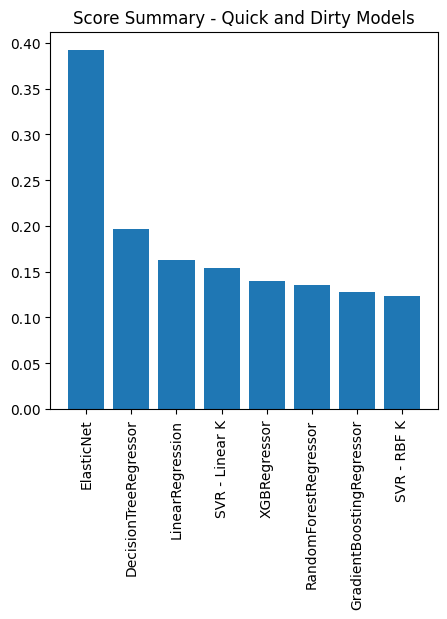

In [73]:
# plot of model score means
plt.figure(figsize=(5, 5), dpi=100)
plt.title("Score Summary - Quick and Dirty Models")
sorted_scores = results['Mean Score'].sort_values(ascending=False)
plt.bar(x=sorted_scores.index, height=sorted_scores)
plt.xticks(rotation=90);

### 3.2.3 Quick and Dirty Model Conclusions
- Based on the above, it looks like the top three models are:
    - SVR with radial basis kernel
    - Gradient boosting regressor
    - Random forest regressor
- The worst model was elastic net regression
- Based on this, I'm going to tune the top 3, and also ElasticNet, just too see if I can figure out why it performed so badly, and to see how much I can improve it

## 3.3 Model Tuning
- Now I'll tune the models mentioned above, and try to improve their scores
- For each model, I am going to:
    - First, perform a RandomizedSearchCV, training 1,000 models in order to determine a rough estimate for the ideal parameters
    - Second, perform a finer GridSearchCV based on the results of the RandomizedSearchCV, to hone in on the best parameters

### 3.3.1 Support Vector Machine Regressor with RBF Kernel
- In this section I'll tune a SVM Regressor further
- I'll tune the following hyper parameters:
    - **C**: This is essentially a regualization parameter for an SVM.  In sk-learn, the strength of the regularization is inversely proportional to C, and the value passed must be positive.
    - **gamma**: This is the kernel coefficient for an rbf kernel and essentially also regularizes the model.  A higher gamma reduces regularization and vice versa.  For purposes of this model, I'll just choose either 'scale' or 'auto' rather than tuning an integer value (see sk-learn documentation for further explanation)
    - **epsilon**: For SVM regression, the model is trying to fit as many instances "on the street" (or hyper street to be more accurate) as possibel.  This means that it is trying to fit as many training instances between its margins and avoid margin violations (instances that are not on the hyper street).  Epsilon control the "width" of the street.
- You'll see that based on the RandomizedSearchCV 'auto' works best for gamma.  Therefore for the finer grid search, I'll set gamma to this, and then tune the C and epsilon values further

In [74]:
# parameters for SVM RandomizedSearchCV
svm_rbf_reg_params = {
    'C': stats.loguniform(0.01, 15),
    'gamma': ['scale', 'auto'],
    'epsilon': stats.loguniform(0.1, 5)
}

# create new SVM model instance
svm_rbf_reg = SVR(kernel='rbf')

# set up SVM RandomizedSearchCV
svm_rbf_search = RandomizedSearchCV(estimator=svm_rbf_reg,
                                    param_distributions=svm_rbf_reg_params,
                                    n_iter=200,
                                    cv=5,
                                    scoring='neg_mean_squared_error',
                                    verbose=1,
                                    n_jobs=-1)

# fit SVM RandomizedSearchCV
svm_rbf_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=200, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f01534ad0>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f01377510>,
                                        'gamma': ['scale', 'auto']},
                   scoring='neg_mean_squared_error', verbose=1)

In [75]:
# get the best params from the RandomizedSearchCV
svm_rbf_search.best_params_

{'C': 0.7861156077870365, 'epsilon': 0.11274575775187595, 'gamma': 'auto'}

In [76]:
# parameters for SVM GridSearchCV
svm_rbf_reg_param_grid = {
    'C': [1, 2, 2.25, 2.50, 2.75, 3],
    'epsilon': [0.05, 0.1, 0.15, 0.2, 0.3]
}

# create SVM model instance
svm_rbf_reg = SVR(kernel='rbf', gamma='auto')

# set up SVM GridSearchCV
svm_rbf_fine_search = GridSearchCV(estimator=svm_rbf_reg,
                                   param_grid=svm_rbf_reg_param_grid,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   verbose=1,
                                   n_jobs=-1)

# fit SVM GridSearchCV
svm_rbf_fine_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(gamma='auto'), n_jobs=-1,
             param_grid={'C': [1, 2, 2.25, 2.5, 2.75, 3],
                         'epsilon': [0.05, 0.1, 0.15, 0.2, 0.3]},
             scoring='neg_mean_squared_error', verbose=1)

In [77]:
# get the best params from the GridSearchCV
svm_rbf_fine_search.best_params_

{'C': 2, 'epsilon': 0.05}

### 3.3.2 Gradient Boosting Regressor
- In this section I'll tune a Gradient Boosting Regressor further
- I'll tune the following hyper parameters:
    - **loss**: The loss function that is optimized.  I'll choose between 'ls' which is least squares regression, or 'lad' which is least absolute deviation.
    - **learning_rate**: This affects how much each tree in the gradient booster contributes to the ensembled model.  A lower value means that more trees are required to fit the training set and vice versa.  Lower values normally generalize better to new data.
    - **n_estimators**: The total number of trees/boosting stages to perform
    - **subsample**: The fraction of training instances that is used to train each tree.  For example, if its set to 0.50, 50% of the training instances are used.  A lower value increases bias and reduces variance.
    - **max_features**: The number of features to look at when determining a split in the tree.  I'll choose between sklearns options 'auto' and 'log' (see sk-learn documentation for further details)
- You'll see that based on the RandomizedSearchCV 'lad' loss, and 'auto' max_features work best.  Therefore for the finer grid search, I'll set these parameters to these options, and then tune the the remaining hyper parameters further.

In [78]:
# parameters for gb RandomizedSearchCV
grad_boost_reg_params = {
    'loss': ['ls', 'lad'],
    'learning_rate': stats.loguniform(0.1, 1),
    'n_estimators':  stats.randint(100, 1500),
    'subsample': stats.loguniform(0.1, 1),
    'max_features': ['auto', 'log2']
}

# create new gb model instance
grad_boost_reg = GradientBoostingRegressor(random_state=42)

# set up gb RandomizedSearchCV
grad_boost_search = RandomizedSearchCV(estimator=grad_boost_reg,
                                       param_distributions=grad_boost_reg_params,
                                       n_iter=200,
                                       cv=5,
                                       scoring='neg_mean_squared_error',
                                       verbose=1,
                                       n_jobs=-1)

# fit gb RandomizedSearchCV
grad_boost_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f02624d50>,
                                        'loss': ['ls', 'lad'],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f02624550>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f02645550>},
                   scoring='neg_mean_squared_error', verbose=1)

In [79]:
# get the best params from the RandomizedSearchCV
grad_boost_search.best_params_

{'learning_rate': 0.13358211126203653,
 'loss': 'lad',
 'max_features': 'auto',
 'n_estimators': 509,
 'subsample': 0.8336733268930253}

In [80]:
# parameters for gb GridSearchCV
grad_boost_reg_param_grid = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20],
    'n_estimators':  [750, 780, 800, 900],
    'subsample': [0.4, 0.5, 0.55, 0.6, 0.7]
}

# create gb model instance
grad_boost_reg = GradientBoostingRegressor(loss='lad', max_features='auto', random_state=42)

# set up gb GridSearchCV
grad_boost_fine_search = GridSearchCV(estimator=grad_boost_reg,
                                      param_grid=grad_boost_reg_param_grid,
                                      cv=5,
                                      scoring='neg_mean_squared_error',
                                      verbose=1,
                                      n_jobs=-1)

# fit gb GridSearchCV
grad_boost_fine_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='lad',
                                                 max_features='auto',
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'n_estimators': [750, 780, 800, 900],
                         'subsample': [0.4, 0.5, 0.55, 0.6, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [81]:
# get the best params from the GridSearchCV
grad_boost_fine_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 900, 'subsample': 0.5}

It looks like n_estimators has potential to be tuned further, let's run another quick grid search below:

In [82]:
# parameters for second gb GridSearchCV
grad_boost_reg_param_grid2 = {
    'n_estimators':  [900, 925, 950, 975, 1000],
}

# create gb model instance
grad_boost_reg = GradientBoostingRegressor(loss='lad', max_features='auto', 
                                           learning_rate=0.1, subsample=0.5,
                                           random_state=42)

# set up second GridSearchCV
grad_boost_fine_search2 = GridSearchCV(estimator=grad_boost_reg,
                                       param_grid=grad_boost_reg_param_grid2,
                                       cv=5,
                                       scoring='neg_mean_squared_error',
                                       verbose=1,
                                       n_jobs=-1)

# fit gb GridSearchCV
grad_boost_fine_search2.fit(data_prepared, data_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='lad',
                                                 max_features='auto',
                                                 random_state=42,
                                                 subsample=0.5),
             n_jobs=-1, param_grid={'n_estimators': [900, 925, 950, 975, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [83]:
# get the best params from the second GridSearchCV
grad_boost_fine_search2.best_params_

{'n_estimators': 900}

### 3.3.3 Random Forest Regressor
- In this section I'll tune a Random Forest Regressor further
- I'll tune the following hyper parameters:
    - **n_estimators**: The total number of trees/boosting stages to perform
    - **max_features**: The number of features to look at when determining a split in the tree.  I'll choose between sklearns options 'auto' and 'log' (see sk-learn documentation for further details)
    - **bootstrap**: Whether or not to perform bootstrapping when forming each tree.
- You'll see that based on the RandomizedSearchCV 'auto' max_features, and 'True' bootstrap work best.  Therefore for the finer grid search, I'll set these parameters to these options, and then tune n_estimators further.

In [84]:
# parameters for rf RandomizedSearchCV
rf_reg_params = {
    'n_estimators': stats.randint(100, 1500),
    'max_features': ['auto', 'log2'],
    'bootstrap': [True, False]
}

# create new rf model instance
rf_reg = RandomForestRegressor(random_state=42)

# set up rf RandomizedSearchCV
rf_search = RandomizedSearchCV(estimator=rf_reg,
                               param_distributions=rf_reg_params,
                               n_iter=200,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=1,
                               n_jobs=-1)

# fit rf RandomizedSearchCV
rf_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f01c876d0>},
                   scoring='neg_mean_squared_error', verbose=1)

In [85]:
# get the best params from the RandomizedSearchCV
rf_search.best_params_

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 709}

In [86]:
# parameters for gb GridSearchCV
rf_reg_param_grid = {
    'n_estimators':  [700, 720, 740, 760, 800],
}

# create gb model instance
rf_reg = RandomForestRegressor(random_state=42, max_features='auto', bootstrap=True)

# set up gb GridSearchCV
rf_fine_search = GridSearchCV(estimator=rf_reg,
                              param_grid=rf_reg_param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              verbose=1,
                              n_jobs=-1)

# fit gb GridSearchCV
rf_fine_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [700, 720, 740, 760, 800]},
             scoring='neg_mean_squared_error', verbose=1)

In [87]:
# get the best params from the GridSearchCV
rf_fine_search.best_params_

{'n_estimators': 740}

### 3.3.4 ElasticNet
- In this section I'll tune an Elastic Net model further
- I'll tune the following hyper parameters:
    - **alpha**:  Determines the amount of regulariazation to perform.  If = 0, the this is just normal linear regression (least squares)
    - **l1 ratio**: Determines the mixing parameter of lasso and ridge regressor (the type of penalties, either l1 or l2).  If = 0 then the penalty is l2, if = 1 then the penalty is l1
 - You'll see that based on the RandomizedSearchCV, alpha almost equal to 0 is what works best.  This means that normal linear regression peformed better than regularized regression, which must mean the data is quite linearly seperable.
 - Based on this I won't tune the model further with GridSearchCV

In [88]:
# parameters for en RandomizedSearchCV
en_reg_params = {
    'alpha': stats.loguniform(0.01, 10),
    'l1_ratio': stats.loguniform(0.01, 0.99),
}

# create new en model instance
en_reg = ElasticNet(random_state=42)

# set up en RandomizedSearchCV
en_search = RandomizedSearchCV(estimator=en_reg,
                               param_distributions=en_reg_params,
                               n_iter=200,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=1,
                               n_jobs=-1)

# fit en RandomizedSearchCV
en_search.fit(data_prepared, data_labels)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f025a6210>,
                                        'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f025a6e10>},
                   scoring='neg_mean_squared_error', verbose=1)

In [89]:
# get the best params from the RandomizedSearchCV
en_search.best_params_

{'alpha': 0.010376194099933992, 'l1_ratio': 0.020622278727696258}

## 3.4 Save Models
- Now I'll save the models, which is an important step in case I want to work with them again and not have to re-run the above cells
- This will save a lot of time (especially for the gb and rf models, which took 4-5 hours to train on my computer)

In [90]:
# create variable for each final model
final_svm = svm_rbf_fine_search.best_estimator_
final_grad_boost = grad_boost_fine_search2.best_estimator_
final_rf = rf_fine_search.best_estimator_
final_en = en_search.best_estimator_

In [91]:
# save final models
dump(final_svm, 'final_svm.joblib')
dump(final_grad_boost, 'final_grad_boost.joblib')
dump(final_rf, 'final_rf.joblib')
dump(final_en, 'final_en.joblib')

['final_en.joblib']

## 3.5 Load Models
- Now I'll load the models back up

In [92]:
# load models
final_svm = load('../input/ames-models/final_svm.joblib')
final_grad_boost = load('../input/ames-models/final_grad_boost.joblib')
final_rf = load('../input/ames-models/final_rf.joblib')
final_en = load('../input/ames-models/final_en.joblib')

## 3.6 Score Tuned Models
- Here I'll use the tuned models to predict on the training set and look at the RLMSE

In [93]:
# get predictions for each model
svm_predictions = final_svm.predict(data_prepared)
grad_boost_predictions = final_grad_boost.predict(data_prepared)
rf_predictions = final_rf.predict(data_prepared)
en_predictions = final_en.predict(data_prepared)

In [94]:
# list of final models
final_models = [final_svm, final_grad_boost, final_rf, final_en]

# list of final models predictions
final_predictions = [svm_predictions, grad_boost_predictions, rf_predictions, en_predictions]

# lists to store rlmse and model names
rlmse = []
final_model_names = []

# fill rlmse list
for predictions in final_predictions:
    rlmse.append(mean_squared_error(y_true=data_labels, y_pred=predictions, squared=False))

# fill model name list
for model in final_models:
    final_model_names.append(type(model).__name__)

# create DataFrame with model scores and sort based on score
final_scores = pd.DataFrame(rlmse, index=final_model_names, columns=['RLMSE'])
final_scores.sort_values('RLMSE')

,RLMSE
RandomForestRegressor,0.050905
GradientBoostingRegressor,0.072104
SVR,0.092119
ElasticNet,0.108571


## 3.7 Model Learning Curves
- In this section I'll plot each of the models learning curves in order to assess if any of the models are over or under fitting
- First I'll define a function to plot the learning curves
    - I created this function myself with inspiration from Hands on ML by Aurelien Geron
    - If anyone reviewing this workbook has any tips on how it can be improved, please feel free to reach out!

In [95]:
def plot_learning_curves(model, X, y, title, ax=None, splits=50):
    '''Calculate and create a dataframe that summarizes the missing data in a dataset
    
    Parameters
    -----------
    model : sklearn.estimator
        The model that you want to plot the learning curve for
        
    X : np.array
        The training set
    
    y: np.array
        The training labels
    
    title: String
        The title of the learning curve
    
    ax: matplotlib.axes
        The ax that you would like to plot the learning curve too
        
    splits: int
        The number of splits the data will be split into for plotting purposes.
        E.g. If a dataset has 100 instances, and split is 10, the learning curve
        will be plotted for 10, 20, 30, ..., 100 instances.  Default value is 50.
        
    '''
    
    # set the matplot lib axes
    ax=ax
    
    # split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # lists to store train and validation errors
    train_errors, val_errors = [], []
    
    # create list of training instances to iterate through for plotting
    train_sizes = np.linspace(0.001, 1.0, splits)
    instances = [int(round(len(X) * i, 0)) for i in train_sizes]

    # train models based on batches of dataset and append losses to lists
    for i in instances:
        model.fit(X_train[:i], y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:i], y_train_predict, squared=False))
        val_errors.append(mean_squared_error(y_val, y_val_predict, squared=False))
    
    # plot the learning curves
    ax.plot(instances, train_errors, "r-+", linewidth=2, label="train")
    ax.plot(instances, val_errors, "b-", linewidth=3, label="val")
    ax.legend(loc='best')
    ax.set_title(title)

In [96]:
# load models into a fresh variable so that original models are not affected
svm_lc = load('../input/ames-models/final_svm.joblib')
gb_lc = load('../input/ames-models/final_grad_boost.joblib')
rf_lc = load('../input/ames-models/final_rf.joblib')
en_lc = load('../input/ames-models/final_en.joblib')

In [97]:
# create dense array to plot learning curves
# note: i did this since my function i created below didn't work with a sparse array
# i wouldn't recommend doing this with large datasets (can take up all of memory)
# if anyone has tips on how to improve my fucntion that would be great!!
dense_data = data_prepared.todense()

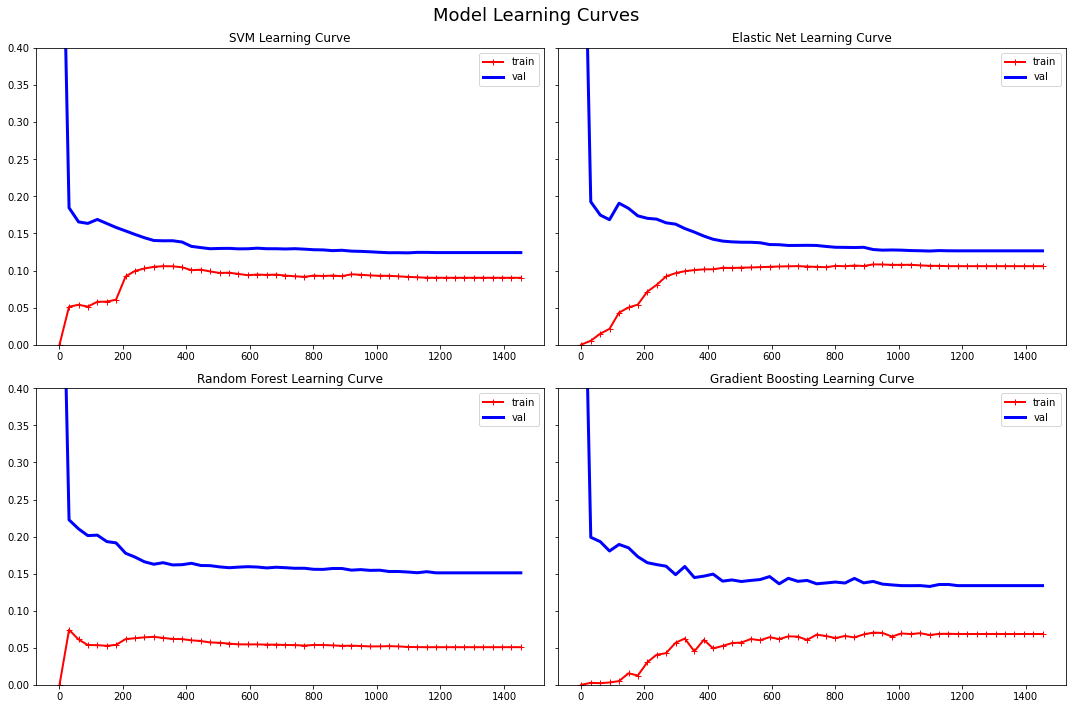

In [98]:
# filter out warnings that will occur when plotting learning curves but are not important
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# plot learning curves
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15, 10))
plot_learning_curves(svm_lc, dense_data, data_labels, ax=ax1, title="SVM Learning Curve")
plot_learning_curves(en_lc, dense_data, data_labels, ax=ax2, title="Elastic Net Learning Curve")
plot_learning_curves(rf_lc, dense_data, data_labels, ax=ax3, title="Random Forest Learning Curve")
plot_learning_curves(gb_lc, dense_data, data_labels, ax=ax4, title="Gradient Boosting Learning Curve")
ax1.set_ylim(0, 0.4)
ax3.set_ylim(0, 0.4)
plt.suptitle("Model Learning Curves", fontsize=18)
plt.tight_layout()

Based on the above learning curves it looks like the SVM and ElasticNet models are fitting the data nicely.  While I was hoping for an RMLSE of 0.10, I think the above is quite decent as well.

In terms of the random forest and GB models - it looks like these models are overfitting the training set quite a bit.  In a real life scenario, you could attempt to correct this by adding more data.  Another way to address overfitting would be to regularize the models further.  However - I'm going to ensemble them next, and I'm happy with the way the scores are for the purposes of this project - therefore I won't tune them any further.  (some ways that they could have been tuned would be, reducing the number of trees, increasing the number of samples required to split at a leaf etc.)

## 3.8 Model Ensembling
- In this section I'll ensemble the models I've tuned to create a voting regressor.
- Often, when you aggregate multiple models with similar scores/accuracy, the predictions that you get from an ensembled modeled will actually be better than the individual models
- This tends to work best if the models themselves are inherently different (e.g. different algorithms)

In [99]:
# model names in String format
names = ['final_svm', 'final_grad_boost', 'final_rf', 'final_en']

# create voting regressor
voting_reg = VotingRegressor(estimators=list(zip(names, final_models)))

# fit voting regressor to data
voting_reg.fit(data_prepared, data_labels)

VotingRegressor(estimators=[('final_svm', SVR(C=2, epsilon=0.05, gamma='auto')),
                            ('final_grad_boost',
                             GradientBoostingRegressor(loss='lad',
                                                       max_features='auto',
                                                       n_estimators=900,
                                                       random_state=42,
                                                       subsample=0.5)),
                            ('final_rf',
                             RandomForestRegressor(n_estimators=740,
                                                   random_state=42)),
                            ('final_en',
                             ElasticNet(alpha=0.012754896584548113,
                                        l1_ratio=0.01378673414214637,
                                        random_state=42))])

In [100]:
# predict with voting model
voting_predictions =voting_reg.predict(data_prepared)

# calculated RLMSE on voting model predictions
mean_squared_error(y_true=data_labels, y_pred=voting_predictions, squared=False)

0.0755763556550431

In [101]:
# appending voting model and scores to final model lists
final_models.append(voting_reg)
final_predictions.append(voting_predictions)

# 4.0 Final Predictions
- Finally, I'll use the models I've created to make predictions on the test set
- I'll use each model to get a set of predictions, and submit each to kaggle to see which model does the best
- Here, you'll see the power of the sk-learn pipeline, we can do everything we did to the train set to the test set in one line of code
- One important thing to note is that I'll need to re-transform the predictions back to normal $ amounts since I applied a log transfomration to the sales price in creating the models

In [102]:
# create copy of test data
X_test = data_test

# run test data through pipeline
X_test_prepared = full_pipeline.transform(X_test)

In [103]:
# lists for test predictions and transformed test predictions
test_predictions = []
transformed_test_predictions = []

# predict for each model and append to predictions list above
for model in final_models:
    test_predictions.append(model.predict(X_test_prepared))
    
# re-transform each models predictions and append to transformed predictions list above
for predictions in test_predictions:
    transformed_test_predictions.append(pd.DataFrame(np.exp(predictions)))    

In [104]:
# create .csv file for each model
for model_num, predictions in enumerate(transformed_test_predictions):
    submission = pd.DataFrame()
    submission['Id'] = data_test['Id']
    submission['SalePrice'] = predictions
    submission.to_csv(str(model_num) + 'submission', index=False)
    
# the .csv files will be named as follows:
# 0submission.csv - this is the SVR Model
# 1submission.csv - this is the GB Model
# 2submission.csv - this is the RF Model
# 3submission.csv - this is the EN Model
# 4submission.csv - this is the Voting Regressor Model

# Thank you!
- If you've reviewd my notebook, thank you very much!
- Please feel free to let me know if you have any comments/suggestions 